In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f38ea10c-7913-4c62-86b4-ebe09dd5cb68',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-12-08T18:07:09.728Z', 'error_code': 0, 'error_message': None, 'elapsed': 66, 'credit_count': 25, 'notice': None, 'total_count': 8883}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10601, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [11]:
type(data)

dict

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
data = pd.json_normalize(data['data'])

In [14]:
data.head()

id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             10601   
1  1027     Ethereum    ETH  ethereum              7987   
2   825  Tether USDt   USDT    tether             67611   
3  1839          BNB    BNB       bnb              1823   
4    52          XRP    XRP       xrp              1166   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2017-07-25T00:00:00.000Z   
4  2013-08-04T00:00:00.000Z   

                                                tags    max_supply  \
0  [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1  [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2  [payments, stablecoin, asset-backed-stablecoin...           NaN   
3  [marketplace, centralized-exchange, payments, ...           NaN   
4  [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   

   circulating_supply total_supply  infinite_supply  platform  cmc_rank  \
0        1.956422e+07     19564225            False       NaN         1   
1        1.202200e+08   1.2022e+08             True       NaN         2   
2        9.025588e+10  9.26091e+10             True       NaN         3   
3        1.516972e+08  1.51697e+08            False       NaN         4   
4        5.375746e+10  99988170772            False       NaN         5   

   self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                               NaN                       NaN        NaN   
1                               NaN                       NaN        NaN   
2                               NaN                       NaN        NaN   
3                               NaN                       NaN        NaN   
4                               NaN                       NaN        NaN   

               last_updated  quote.USD.price  quote.USD.volume_24h  \
0  2023-12-08T18:06:00.000Z     43781.685523          2.378314e+10   
1  2023-12-08T18:06:00.000Z      2350.205266          1.396814e+10   
2  2023-12-08T18:05:00.000Z         1.000214          4.969740e+10   
3  2023-12-08T18:05:00.000Z       235.955021          8.214535e+08   
4  2023-12-08T18:06:00.000Z         0.665728          1.792260e+09   

   quote.USD.volume_change_24h  quote.USD.percent_change_1h  \
0                     -11.5947                    -0.080616   
1                       3.0672                    -0.231350   
2                      -1.9966                     0.004158   
3                      -0.1110                     0.058689   
4                     -10.0080                    -0.112359   

   quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
0                      0.867418                    12.775005   
1                      0.578322                    12.184514   
2                     -0.015048                     0.006614   
3                      1.229872                     3.309630   
4                      3.675454                     9.168934   

   quote.USD.percent_change_30d  quote.USD.percent_change_60d  \
0                     23.833397                     58.390678   
1                     24.083251                     48.598207   
2                      0.016320                      0.005046   
3                     -4.174566                     14.162611   
4                     -3.264678                     32.859078   

   quote.USD.percent_change_90d  quote.USD.market_cap  \
0                     69.216914          8.565547e+11   
1                     43.836983          2.825418e+11   
2                      0.036580          9.027521e+10   
3                      9.812885          3.579371e+10   
4                     32.224548          3.578785e+10   

   quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                         52.6982                        9.194154e+11   
1                         17.3829                        2.825418e+11

In [15]:
data.describe()

id  num_market_pairs    max_supply  circulating_supply  \
count   5000.000000       5000.000000  3.660000e+03        5.000000e+03   
mean   15056.628800         57.831800  6.803165e+15        3.552720e+14   
std     8473.776926       1046.071923  1.077012e+17        1.444989e+16   
min        1.000000          1.000000  0.000000e+00        0.000000e+00   
25%     7961.750000          4.000000  1.000000e+08        0.000000e+00   
50%    14421.500000          9.000000  1.000000e+09        0.000000e+00   
75%    22930.000000         21.000000  5.000000e+09        1.002433e+08   
max    28651.000000      67611.000000  4.218000e+18        9.818468e+17   

       platform     cmc_rank  self_reported_circulating_supply  \
count       0.0  5000.000000                      3.002000e+03   
mean        NaN  2500.500000                      1.532823e+21   
std         NaN  1443.520003                      7.948808e+22   
min         NaN     1.000000                     -2.500000e+07   
25%         NaN  1250.750000                      2.097600e+07   
50%         NaN  2500.500000                      1.482260e+08   
75%         NaN  3750.250000                      1.400000e+09   
max         NaN  5000.000000                      4.351688e+24   

       self_reported_market_cap     tvl_ratio  quote.USD.price  \
count              3.002000e+03  8.300000e+01     5.000000e+03   
mean               1.947894e+19  5.759615e+04     5.205698e+04   
std                1.067261e+21  5.243432e+05     3.661940e+06   
min               -5.003385e+07  3.359010e-03     7.672510e-19   
25%                3.329396e+05  2.114591e-01     1.091010e-03   
50%                2.164098e+06  1.020238e+00     1.472789e-02   
75%                1.401137e+07  4.647558e+00     2.370049e-01   
max                5.847577e+22  4.777036e+06     2.589380e+08   

       quote.USD.volume_24h  quote.USD.volume_change_24h  \
count          5.000000e+03                 5.000000e+03   
mean           2.705651e+07                 1.013543e+03   
std            8.135672e+08                 5.595174e+04   
min            0.000000e+00                -1.000000e+02   
25%            1.844985e+04                -1.621820e+01   
50%            7.939026e+04                 5.867500e-01   
75%            5.198117e+05                 3.308900e+01   
max            4.969740e+10                 3.943287e+06   

       quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
count                  5000.000000                   5000.000000   
mean                      0.123136                    176.250223   
std                       6.505549                  12093.523041   
min                     -90.319491                    -99.998528   
25%                      -0.326703                     -1.381190   
50%                       0.000000                      0.921077   
75%                       0.332935                      5.141836   
max                     278.015534                 855125.269574   

       quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
count                  5000.000000                  5.000000e+03   
mean                    195.785196                  1.857655e+04   
std                   12095.147579                  1.284571e+06   
min                     -99.998523                 -9.894886e+01   
25%                      -1.113191                 -2.420271e+00   
50%                       7.103806                  1.560926e+01   
75%                      21.063912                  5.382479e+01   
max                  855125.269574                  9.082758e+07   

       quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
count                  5.000000e+03                  5.000000e+03   
mean                   2.078656e+11                  1.295956e+11   
std                    1.469832e+13                  9.163788e+12   
min                   -9.995271e+01                 -9.999852e+01   
25%                   -3.098255e-02    

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  5000 non-null   int64  
 1   name                                5000 non-null   object 
 2   symbol                              5000 non-null   object 
 3   slug                                5000 non-null   object 
 4   num_market_pairs                    5000 non-null   int64  
 5   date_added                          5000 non-null   object 
 6   tags                                5000 non-null   object 
 7   max_supply                          3660 non-null   float64
 8   circulating_supply                  5000 non-null   float64
 9   total_supply                        5000 non-null   object 
 10  infinite_supply                     5000 non-null   bool   
 11  platform                            0 non-n

In [17]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [18]:
data.head()

id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             10601   
1  1027     Ethereum    ETH  ethereum              7987   
2   825  Tether USDt   USDT    tether             67611   
3  1839          BNB    BNB       bnb              1823   
4    52          XRP    XRP       xrp              1166   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2017-07-25T00:00:00.000Z   
4  2013-08-04T00:00:00.000Z   

                                                tags      max_supply  \
0  [mineable, pow, sha-256, store-of-value, state...     21000000.00   
1  [pos, smart-contracts, ethereum-ecosystem, coi...             nan   
2  [payments, stablecoin, asset-backed-stablecoin...             nan   
3  [marketplace, centralized-exchange, payments, ...             nan   
4  [medium-of-exchange, enterprise-solutions, arr... 100000000000.00   

   circulating_supply   total_supply  infinite_supply  platform  cmc_rank  \
0         19564225.00       19564225            False       nan         1   
1        120220036.17   120220036.17             True       nan         2   
2      90255875639.26 92609080553.21             True       nan         3   
3        151697161.05   151697161.05            False       nan         4   
4      53757460767.00    99988170772            False       nan         5   

   self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                               nan                       nan        nan   
1                               nan                       nan        nan   
2                               nan                       nan        nan   
3                               nan                       nan        nan   
4                               nan                       nan        nan   

               last_updated  quote.USD.price  quote.USD.volume_24h  \
0  2023-12-08T18:06:00.000Z         43781.69        23783139932.89   
1  2023-12-08T18:06:00.000Z          2350.21        13968139790.74   
2  2023-12-08T18:05:00.000Z             1.00        49697399462.85   
3  2023-12-08T18:05:00.000Z           235.96          821453532.04   
4  2023-12-08T18:06:00.000Z             0.67         1792259989.19   

   quote.USD.volume_change_24h  quote.USD.percent_change_1h  \
0                       -11.59                        -0.08   
1                         3.07                        -0.23   
2                        -2.00                         0.00   
3                        -0.11                         0.06   
4                       -10.01                        -0.11   

   quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
0                          0.87                        12.78   
1                          0.58                        12.18   
2                         -0.02                         0.01   
3                          1.23                         3.31   
4                          3.68                         9.17   

   quote.USD.percent_change_30d  quote.USD.percent_change_60d  \
0                         23.83                         58.39   
1                         24.08                         48.60   
2                          0.02                          0.01   
3                         -4.17                         14.16   
4                         -3.26                         32.86   

   quote.USD.percent_change_90d  quote.USD.market_cap  \
0                         69.22       856554746449.23   
1                         43.84       282541762056.57   
2                          0.04        90275213602.02   
3                          9.81        35793706764.60   
4                         32.22        35787849610.43   

   quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                           52.70                     919415395980.87   
1                           17.38            

In [19]:
drop_cols = ['platform', 'self_reported_circulating_supply', 'self_reported_market_cap', 'quote.USD.tvl', 'platform.id', 'platform.name', 'platform.symbol', 'platform.slug', 'platform.token_address', 'max_supply']

In [20]:
data['quote.USD.tvl'].value_counts()

1160847.66      1
125021.66       1
32743590.08     1
288577.56       1
356030161.45    1
               ..
272640.48       1
3529677.47      1
89244867.15     1
24585930.90     1
64578765.70     1
Name: quote.USD.tvl, Length: 88, dtype: int64

In [21]:
data.drop(['platform', 'self_reported_circulating_supply', 'self_reported_market_cap', 'quote.USD.tvl', 'platform.id', 'platform.name', 'platform.symbol', 'platform.slug', 'platform.token_address', 'max_supply'], axis=1, inplace=True)


In [22]:
data.drop(['tvl_ratio'],axis=1,inplace=True)

In [23]:
data.drop(['date_added', 'symbol', 'slug', 'cmc_rank', 'quote.USD.last_updated'],axis=1,inplace=True)

In [24]:
data.drop(['id'],axis=1,inplace=True)

In [25]:
data.head()

name  num_market_pairs  \
0      Bitcoin             10601   
1     Ethereum              7987   
2  Tether USDt             67611   
3          BNB              1823   
4          XRP              1166   

                                                tags  circulating_supply  \
0  [mineable, pow, sha-256, store-of-value, state...         19564225.00   
1  [pos, smart-contracts, ethereum-ecosystem, coi...        120220036.17   
2  [payments, stablecoin, asset-backed-stablecoin...      90255875639.26   
3  [marketplace, centralized-exchange, payments, ...        151697161.05   
4  [medium-of-exchange, enterprise-solutions, arr...      53757460767.00   

    total_supply  infinite_supply              last_updated  quote.USD.price  \
0       19564225            False  2023-12-08T18:06:00.000Z         43781.69   
1   120220036.17             True  2023-12-08T18:06:00.000Z          2350.21   
2 92609080553.21             True  2023-12-08T18:05:00.000Z             1.00   
3   151697161.05            False  2023-12-08T18:05:00.000Z           235.96   
4    99988170772            False  2023-12-08T18:06:00.000Z             0.67   

   quote.USD.volume_24h  quote.USD.volume_change_24h  \
0        23783139932.89                       -11.59   
1        13968139790.74                         3.07   
2        49697399462.85                        -2.00   
3          821453532.04                        -0.11   
4         1792259989.19                       -10.01   

   quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
0                        -0.08                          0.87   
1                        -0.23                          0.58   
2                         0.00                         -0.02   
3                         0.06                          1.23   
4                        -0.11                          3.68   

   quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
0                        12.78                         23.83   
1                        12.18                         24.08   
2                         0.01                          0.02   
3                         3.31                         -4.17   
4                         9.17                         -3.26   

   quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
0                         58.39                         69.22   
1                         48.60                         43.84   
2                          0.01                          0.04   
3                         14.16                          9.81   
4                         32.86                         32.22   

   quote.USD.market_cap  quote.USD.market_cap_dominance  \
0       856554746449.23                           52.70   
1       282541762056.57                           17.38   
2        90275213602.02                            5.55   
3        35793706764.60                            2.20   
4        35787849610.43                            2.20   

   quote.USD.fully_diluted_market_cap  
0                     919415395980.87  
1                     282541762056.57  
2                      92628922706.84  
3                      35793706764.60  
4                      66572805150.79

In [26]:
data.describe()

num_market_pairs    circulating_supply  quote.USD.price  \
count           5000.00               5000.00          5000.00   
mean              57.83    355271951877940.06         52056.98   
std             1046.07  14449887619823054.00       3661939.82   
min                1.00                  0.00             0.00   
25%                4.00                  0.00             0.00   
50%                9.00                  0.00             0.01   
75%               21.00          100243274.82             0.24   
max            67611.00 981846777310948352.00     258938015.61   

       quote.USD.volume_24h  quote.USD.volume_change_24h  \
count               5000.00                      5000.00   
mean            27056509.92                      1013.54   
std            813567200.72                     55951.74   
min                    0.00                      -100.00   
25%                18449.85                       -16.22   
50%                79390.26                         0.59   
75%               519811.66                        33.09   
max          49697399462.85                   3943287.49   

       quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
count                      5000.00                       5000.00   
mean                          0.12                        176.25   
std                           6.51                      12093.52   
min                         -90.32                       -100.00   
25%                          -0.33                         -1.38   
50%                           0.00                          0.92   
75%                           0.33                          5.14   
max                         278.02                     855125.27   

       quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
count                      5000.00                       5000.00   
mean                        195.79                      18576.55   
std                       12095.15                    1284570.84   
min                        -100.00                        -98.95   
25%                          -1.11                         -2.42   
50%                           7.10                         15.61   
75%                          21.06                         53.82   
max                      855125.27                   90827583.51   

       quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
count                       5000.00                       5000.00   
mean                207865629387.92               129595586411.69   
std               14698315777858.90              9163788051948.72   
min                          -99.95                       -100.00   
25%                           -0.03                         -7.78   
50%                           35.28                         28.50   
75%                           98.36                         90.58   
max             1039327875908729.88            647977667341841.38   

       quote.USD.market_cap  quote.USD.market_cap_dominance  \
count               5000.00                         5000.00   
mean           342521840.55                            0.02   
std          12864177880.99                            0.79   
min                    0.00                            0.00   
25%                    0.00                            0.00   
50%                    0.00                            0.00   
75%              2862682.35                            0.00   
max         856554746449.23                           52.70   

       quote.USD.fully_diluted_market_cap  
count                             5000.00  
mean                      204270484625.82  
std                     14107589339056.71  
min                                  0.00  
25%                             625445.74  
50%                            5556104.89  
75%                           47498227.45  
max                    997494971433172.75

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                5000 non-null   object 
 1   num_market_pairs                    5000 non-null   int64  
 2   tags                                5000 non-null   object 
 3   circulating_supply                  5000 non-null   float64
 4   total_supply                        5000 non-null   object 
 5   infinite_supply                     5000 non-null   bool   
 6   last_updated                        5000 non-null   object 
 7   quote.USD.price                     5000 non-null   float64
 8   quote.USD.volume_24h                5000 non-null   float64
 9   quote.USD.volume_change_24h         5000 non-null   float64
 10  quote.USD.percent_change_1h         5000 non-null   float64
 11  quote.USD.percent_change_24h        5000 no

In [28]:
data.corr()

num_market_pairs  circulating_supply  \
num_market_pairs                                1.00               -0.00   
circulating_supply                             -0.00                1.00   
infinite_supply                                 0.16               -0.00   
quote.USD.price                                -0.00               -0.00   
quote.USD.volume_24h                            0.91               -0.00   
quote.USD.volume_change_24h                    -0.00               -0.00   
quote.USD.percent_change_1h                    -0.00               -0.00   
quote.USD.percent_change_24h                   -0.00               -0.00   
quote.USD.percent_change_7d                    -0.00               -0.00   
quote.USD.percent_change_30d                   -0.00               -0.00   
quote.USD.percent_change_60d                   -0.00               -0.00   
quote.USD.percent_change_90d                   -0.00               -0.00   
quote.USD.market_cap                            0.27               -0.00   
quote.USD.market_cap_dominance                  0.27               -0.00   
quote.USD.fully_diluted_market_cap              0.00               -0.00   

                                    infinite_supply  quote.USD.price  \
num_market_pairs                               0.16            -0.00   
circulating_supply                            -0.00            -0.00   
infinite_supply                                1.00            -0.00   
quote.USD.price                               -0.00             1.00   
quote.USD.volume_24h                           0.16            -0.00   
quote.USD.volume_change_24h                   -0.00            -0.00   
quote.USD.percent_change_1h                   -0.00            -0.00   
quote.USD.percent_change_24h                  -0.00            -0.00   
quote.USD.percent_change_7d                   -0.00            -0.00   
quote.USD.percent_change_30d                  -0.00            -0.00   
quote.USD.percent_change_60d                  -0.00            -0.00   
quote.USD.percent_change_90d                  -0.00            -0.00   
quote.USD.market_cap                           0.07            -0.00   
quote.USD.market_cap_dominance                 0.07            -0.00   
quote.USD.fully_diluted_market_cap            -0.00            -0.00   

                                    quote.USD.volume_24h  \
num_market_pairs                                    0.91   
circulating_supply                                 -0.00   
infinite_supply                                     0.16   
quote.USD.price                                    -0.00   
quote.USD.volume_24h                                1.00   
quote.USD.volume_change_24h                        -0.00   
quote.USD.percent_change_1h                        -0.00   
quote.USD.percent_change_24h                       -0.00   
quote.USD.percent_change_7d                        -0.00   
quote.USD.percent_change_30d                       -0.00   
quote.USD.percent_change_60d                       -0.00   
quote.USD.percent_change_90d                       -0.00   
quote.USD.market_cap                                0.56   
quote.USD.market_cap_dominance                      0.56   
quote.USD.fully_diluted_market_cap                  0.00   

                                    quote.USD.volume_change_24h  \
num_market_pairs                                          -0.00   
circulating_supply                                        -0.00   
infinite_supply                                           -0.00   
quote.USD.price                                           -0.00   
quote.USD.volume_24h                                      -0.00   
quote.USD.volume_change_24h                                1.00   
quote.USD.percent_change_1h                                0.00   
quote.USD.percent_change_24h                              -0.00   
quote.USD.percent_change_7d                               -0.00   
quote.USD.percent_change_30d       

In [29]:
data[['quote.USD.percent_change_1h', 'quote.USD.price']].corr()

quote.USD.percent_change_1h  quote.USD.price
quote.USD.percent_change_1h                         1.00            -0.00
quote.USD.price                                    -0.00             1.00

In [30]:
#data.drop(data.index[500:],axis=0,inplace=True)

In [31]:
data.tail()

name  num_market_pairs                     tags  \
4995  Sonic Suite                 1                       []   
4996         PIPI                15                       []   
4997         Omni                 2            [pow, scrypt]   
4998          GRN                 4                       []   
4999      Pakcoin                 4  [mineable, pow, scrypt]   

      circulating_supply   total_supply  infinite_supply  \
4995                0.00              0            False   
4996                0.00  1000000000000            False   
4997                0.00      619432.95            False   
4998                0.00     1000000000            False   
4999                0.00       68594750            False   

                  last_updated  quote.USD.price  quote.USD.volume_24h  \
4995  2023-12-08T18:06:00.000Z             0.00               3414.00   
4996  2023-12-08T18:05:00.000Z             0.00               3409.32   
4997  2023-12-08T18:06:00.000Z             0.05               3405.13   
4998  2023-12-08T18:05:00.000Z             0.00               3402.15   
4999  2023-12-08T18:06:00.000Z             0.00               3401.30   

      quote.USD.volume_change_24h  quote.USD.percent_change_1h  \
4995                         0.08                        -4.21   
4996                        27.52                        -0.10   
4997                       -14.35                         0.01   
4998                       324.94                        10.52   
4999                         1.42                        -0.58   

      quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
4995                         -7.03                        -3.46   
4996                          2.26                       -28.82   
4997                          3.26                       -10.84   
4998                         64.72                       -59.39   
4999                          1.39                        -3.46   

      quote.USD.percent_change_30d  quote.USD.percent_change_60d  \
4995                         34.25                         46.88   
4996                        -88.20                        -88.20   
4997                        -19.42                         -6.66   
4998                        -84.27                        -95.71   
4999                        -11.49                         -6.95   

      quote.USD.percent_change_90d  quote.USD.market_cap  \
4995                          8.50                  0.00   
4996                        -88.20                  0.00   
4997                        -10.04                  0.00   
4998                        -96.12                  0.00   
4999                        -13.25                  0.00   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  
4995                            0.00                           246377.10  
4996                            0.00                            61235.06  
4997                            0.00                            33949.56  
4998                            0.00                           474270.00  
4999                            0.00                           670750.42

In [32]:
num_of_bins = 100
sns.distplot(data['quote.USD.percent_change_1h'], bins=num_of_bins)

C:\Users\ishch\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quote.USD.percent_change_1h', ylabel='Density'>

In [33]:
data['quote.USD.percent_change_24h'][1000:5001].describe()

count     4000.00
mean       219.30
std      13520.96
min       -100.00
25%         -1.78
50%          0.79
75%          5.45
max     855125.27
Name: quote.USD.percent_change_24h, dtype: float64

<AxesSubplot:xlabel='quote.USD.percent_change_1h', ylabel='quote.USD.price'>

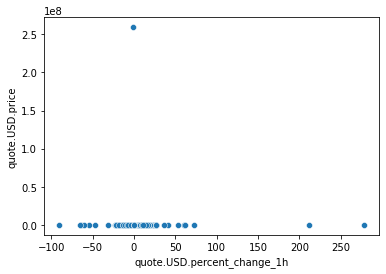

In [34]:
sns.scatterplot(data=data, x ='quote.USD.percent_change_1h', y='quote.USD.price' )

In [22]:
df100 = data.sample(n=100)

In [23]:
df100.describe()

num_market_pairs  circulating_supply  quote.USD.price  \
count            100.00              100.00           100.00   
mean              44.25     101505884052.04             3.20   
std              144.26     993733331864.90            12.92   
min                1.00                0.00             0.00   
25%                4.00                0.00             0.00   
50%               12.00                0.00             0.01   
75%               25.00        120219640.82             0.09   
max             1125.00    9938989997635.00            85.23   

       quote.USD.volume_24h  quote.USD.volume_change_24h  \
count                100.00                       100.00   
mean            12234154.65                        32.99   
std             57495102.58                       175.35   
min                    0.00                       -87.78   
25%                17579.33                       -27.33   
50%                51199.70                        -3.40   
75%               264861.91                        21.72   
max            444511975.92                      1241.50   

       quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
count                       100.00                        100.00   
mean                          0.31                          0.71   
std                           3.67                         18.14   
min                          -8.50                        -96.18   
25%                          -0.56                         -3.07   
50%                          -0.13                          0.57   
75%                           0.33                          4.46   
max                          30.07                         84.62   

       quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
count                       100.00                        100.00   
mean                         23.64                         44.74   
std                         106.53                        115.18   
min                         -96.19                        -93.19   
25%                          -0.90                         -4.54   
50%                           5.90                         12.66   
75%                          23.11                         60.63   
max                        1018.03                        745.54   

       quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
count                        100.00                        100.00   
mean                          89.50                         89.98   
std                          257.80                        270.52   
min                          -96.63                        -96.48   
25%                           -7.24                         -6.44   
50%                           32.27                         39.00   
75%                          107.30                         90.03   
max                         2242.27                       2353.38   

       quote.USD.market_cap  quote.USD.market_cap_dominance  \
count                100.00                          100.00   
mean           198115125.83                            0.01   
std           1184546056.25                            0.05   
min                    0.00                            0.00   
25%                    0.00                            0.00   
50%                    0.00                            0.00   
75%              1382322.65                            0.00   
max           9241436639.53                            0.47   

       quote.USD.fully_diluted_market_cap  
count                              100.00  
mean                         253043300.45  
std                         1232115411.93  
min                                  0.00  
25%                             250573.91  
50%                            2668166.86  
75%                           35632204.98  
max                         9241438643.56

In [24]:
df100.columns

Index(['name', 'num_market_pairs', 'tags', 'circulating_supply',
       'total_supply', 'infinite_supply', 'last_updated', 'quote.USD.price',
       'quote.USD.volume_24h', 'quote.USD.volume_change_24h',
       'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d',
       'quote.USD.market_cap', 'quote.USD.market_cap_dominance',
       'quote.USD.fully_diluted_market_cap'],
      dtype='object')

In [25]:
numeric_cols = ['circulating_supply', 'total_supply', 'infinite_supply', 'quote.USD.price',
       'quote.USD.volume_24h', 'quote.USD.volume_change_24h',
       'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d',
       'quote.USD.market_cap', 'quote.USD.market_cap_dominance',
       'quote.USD.fully_diluted_market_cap']

price_cols = ['quote.USD.price',
       'quote.USD.volume_24h', 'quote.USD.volume_change_24h',
       'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']

In [114]:
numeric_df = data[numeric_cols]

In [115]:
scaler = StandardScaler()

In [116]:
scaled_numeric = scaler.fit_transform(numeric_df)

In [117]:
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols)

In [149]:
scaled_numeric_df.head()

circulating_supply  total_supply  infinite_supply  quote.USD.price  \
0               -0.02         -0.02            -0.11             0.01   
1               -0.02         -0.02             9.00            -0.01   
2               -0.02         -0.02             9.00            -0.01   
3               -0.02         -0.02            -0.11            -0.01   
4               -0.02         -0.02            -0.11            -0.01   

   quote.USD.volume_24h  quote.USD.volume_change_24h  \
0                 35.08                        -0.02   
1                 14.89                        -0.02   
2                 58.92                        -0.03   
3                  0.82                        -0.03   
4                  1.40                        -0.03   

   quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
0                         0.05                          0.04   
1                        -0.06                         -0.05   
2                         0.02                         -0.09   
3                        -0.05                         -0.11   
4                        -0.07                         -0.10   

   quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
0                        -0.04                         -0.01   
1                        -0.08                         -0.01   
2                        -0.16                         -0.01   
3                        -0.16                         -0.01   
4                        -0.15                         -0.01   

   quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
0                         -0.01                         -0.01   
1                         -0.01                         -0.01   
2                         -0.01                         -0.01   
3                         -0.01                         -0.01   
4                         -0.01                         -0.01   

   quote.USD.market_cap  quote.USD.market_cap_dominance  \
0                 66.83                           66.86   
1                 21.23                           21.23   
2                  6.99                            6.99   
3                  2.71                            2.71   
4                  2.59                            2.59   

   quote.USD.fully_diluted_market_cap  percent_change  
0                                0.05               5  
1                                0.00               0  
2                               -0.01               5  
3                               -0.01               0  
4                               -0.01               0

In [107]:
correlation_matrix = scaled_numeric_df[['quote.USD.volume_24h', 'quote.USD.market_cap_dominance']].corr()

In [108]:
correlation_matrix

quote.USD.volume_24h  \
quote.USD.volume_24h                            1.00   
quote.USD.market_cap_dominance                  0.84   

                                quote.USD.market_cap_dominance  
quote.USD.volume_24h                                      0.84  
quote.USD.market_cap_dominance                            1.00

# Analysis/Clustering

In [285]:
sns.distplot(data['quote.USD.market_cap'])

C:\Users\ishch\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quote.USD.market_cap', ylabel='Density'>

In [135]:
clustering1 = KMeans()

In [163]:
clustering1.fit(scaled_numeric_df[[
       'infinite_supply']])

<ipython-input-163-5353e1e1bb35>:1: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  clustering1.fit(scaled_numeric_df[[


KMeans()

In [164]:
clustering1.labels_

array([0, 1, 1, ..., 0, 0, 0])

In [165]:
scaled_numeric_df['percent_change'] = clustering1.labels_
scaled_numeric_df.head()

circulating_supply  total_supply  infinite_supply  quote.USD.price  \
0               -0.02         -0.02            -0.11             0.01   
1               -0.02         -0.02             9.00            -0.01   
2               -0.02         -0.02             9.00            -0.01   
3               -0.02         -0.02            -0.11            -0.01   
4               -0.02         -0.02            -0.11            -0.01   

   quote.USD.volume_24h  quote.USD.volume_change_24h  \
0                 35.08                        -0.02   
1                 14.89                        -0.02   
2                 58.92                        -0.03   
3                  0.82                        -0.03   
4                  1.40                        -0.03   

   quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
0                         0.05                          0.04   
1                        -0.06                         -0.05   
2                         0.02                         -0.09   
3                        -0.05                         -0.11   
4                        -0.07                         -0.10   

   quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
0                        -0.04                         -0.01   
1                        -0.08                         -0.01   
2                        -0.16                         -0.01   
3                        -0.16                         -0.01   
4                        -0.15                         -0.01   

   quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
0                         -0.01                         -0.01   
1                         -0.01                         -0.01   
2                         -0.01                         -0.01   
3                         -0.01                         -0.01   
4                         -0.01                         -0.01   

   quote.USD.market_cap  quote.USD.market_cap_dominance  \
0                 66.83                           66.86   
1                 21.23                           21.23   
2                  6.99                            6.99   
3                  2.71                            2.71   
4                  2.59                            2.59   

   quote.USD.fully_diluted_market_cap  percent_change  
0                                0.05               0  
1                                0.00               1  
2                               -0.01               1  
3                               -0.01               0  
4                               -0.01               0

In [166]:
scaled_numeric_df['percent_change'].value_counts()

0    4939
1      61
Name: percent_change, dtype: int64

In [167]:
clustering1.inertia_

0.0

In [168]:
inertia_scores = []

In [169]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_numeric_df[['percent_change']])
    inertia_scores.append(kmeans.inertia_)

<ipython-input-169-452eb4de8828>:3: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(scaled_numeric_df[['percent_change']])
<ipython-input-169-452eb4de8828>:3: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(scaled_numeric_df[['percent_change']])
<ipython-input-169-452eb4de8828>:3: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(scaled_numeric_df[['percent_change']])
<ipython-input-169-452eb4de8828>:3: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(scaled_numeric_df[['percent_change']])
<ipython-input-169-452eb4de8828>:3: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to dupli

In [143]:
inertia_scores

[204.6637999999924,
 19.85213584733222,
 6.549799639351521,
 2.9997996393505977,
 2.3331329726839147,
 1.333333333333333,
 0.5,
 0.0,
 0.0,
 0.0]

In [144]:
plt.plot(range(1,11), inertia_scores)

plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

Conclusion: Data is heavily skewed around 0 so it doesn't make for a useful column in regards to our goal

In [171]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=scaled_numeric_df,x='quote.USD.volume_24h',y='quote.USD.market_cap_dominance',hue='percent_change',palette='tab10')

<AxesSubplot:xlabel='quote.USD.volume_24h', ylabel='quote.USD.market_cap_dominance'>

In [172]:
data['infinite_supply'].value_counts()

False    4939
True       61
Name: infinite_supply, dtype: int64

In [173]:
icluster = KMeans(n_cluster=2)

In [174]:
icluster.fit(data[['infinite_supply']])

<ipython-input-174-d1a680423cda>:1: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  icluster.fit(data[['infinite_supply']])


KMeans()

In [175]:
data['infinite_cluster'] = clustering1.labels_
data.head()

name  num_market_pairs  \
0      Bitcoin             10599   
1     Ethereum              7963   
2  Tether USDt             67361   
3          BNB              1813   
4          XRP              1166   

                                                tags  circulating_supply  \
0  [mineable, pow, sha-256, store-of-value, state...         19562031.00   
1  [pos, smart-contracts, ethereum-ecosystem, coi...        120230295.78   
2  [payments, stablecoin, asset-backed-stablecoin...      89814116890.38   
3  [marketplace, centralized-exchange, payments, ...        151697927.87   
4  [medium-of-exchange, enterprise-solutions, arr...      53888571585.00   

    total_supply  infinite_supply              last_updated  quote.USD.price  \
0       19562031            False  2023-12-05T21:16:00.000Z         43748.95   
1   120230295.78             True  2023-12-05T21:16:00.000Z          2262.58   
2 92609951831.98             True  2023-12-05T21:15:00.000Z             1.00   
3   151697927.87            False  2023-12-05T21:15:00.000Z           230.50   
4    99988188647            False  2023-12-05T21:16:00.000Z             0.62   

   quote.USD.volume_24h  quote.USD.volume_change_24h  \
0        34842882117.81                       -12.45   
1        14801687165.71                       -11.68   
2        58495748742.52                       -21.27   
3          846035140.43                       -60.55   
4         1425475913.64                       -26.04   

   quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
0                         0.18                          4.81   
1                        -0.33                          1.61   
2                         0.02                          0.02   
3                        -0.28                         -0.53   
4                        -0.38                         -0.29   

   quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
0                        14.68                         24.95   
1                         9.74                         20.08   
2                        -0.00                         -0.05   
3                        -0.23                         -5.36   
4                         1.31                         -5.04   

   quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
0                         56.50                         70.28   
1                         37.45                         38.79   
2                         -0.03                          0.09   
3                          7.99                          7.43   
4                         17.82                         23.71   

   quote.USD.market_cap  quote.USD.market_cap_dominance  \
0       855818264088.19                           53.85   
1       272030332526.87                           17.11   
2        89830641628.22                            5.65   
3        34966433241.69                            2.20   
4        33432071709.82                            2.10   

   quote.USD.fully_diluted_market_cap  infinite_cluster  
0                     918727894146.16                 0  
1                     272030332526.87                 1  
2                      92626990970.46                 1  
3                      34966433241.69                 0  
4                      62039261250.58                 0

In [176]:
data['infinite_cluster'].value_counts()

0    4939
1      61
Name: infinite_cluster, dtype: int64

# Top 100 Coins Analysis

In [35]:
data_top_100 = data.head(100)

In [36]:
data_top_100

name  num_market_pairs  \
0              Bitcoin             10601   
1             Ethereum              7987   
2          Tether USDt             67611   
3                  BNB              1823   
4                  XRP              1166   
..                 ...               ...   
95      dYdX (ethDYDX)               283   
96             Arweave               102   
97               Zcash               325   
98  Trust Wallet Token               201   
99                 Gas                99   

                                                 tags  circulating_supply  \
0   [mineable, pow, sha-256, store-of-value, state...         19564225.00   
1   [pos, smart-contracts, ethereum-ecosystem, coi...        120220036.17   
2   [payments, stablecoin, asset-backed-stablecoin...      90255875639.26   
3   [marketplace, centralized-exchange, payments, ...        151697161.05   
4   [medium-of-exchange, enterprise-solutions, arr...      53757460767.00   
..                                                ...                 ...   
95  [cosmos-ecosystem, defi, derivatives, zero-kno...        183765523.00   
96  [distributed-computing, filesharing, storage, ...         65454185.00   
97  [mineable, pow, equihash, medium-of-exchange, ...         16328268.75   
98             [wallet, polygon-ecosystem, bnb-chain]        416649900.00   
99    [medium-of-exchange, payments, smart-contracts]         65314407.00   

     total_supply  infinite_supply              last_updated  quote.USD.price  \
0        19564225            False  2023-12-08T18:06:00.000Z         43781.69   
1    120220036.17             True  2023-12-08T18:06:00.000Z          2350.21   
2  92609080553.21             True  2023-12-08T18:05:00.000Z             1.00   
3    151697161.05            False  2023-12-08T18:05:00.000Z           235.96   
4     99988170772            False  2023-12-08T18:06:00.000Z             0.67   
..            ...              ...                       ...              ...   
95     1000000000            False  2023-12-08T18:05:00.000Z             3.05   
96       65454185            False  2023-12-08T18:05:00.000Z             8.55   
97    16328268.75            False  2023-12-08T18:06:00.000Z            33.19   
98      999668148            False  2023-12-08T18:05:00.000Z             1.23   
99       65314407            False  2023-12-08T18:05:00.000Z             7.85   

    quote.USD.volume_24h  quote.USD.volume_change_24h  \
0         23783139932.89                       -11.59   
1         13968139790.74                         3.07   
2         49697399462.85                        -2.00   
3           821453532.04                        -0.11   
4          1792259989.19                       -10.01   
..                   ...                          ...   
95          126881749.09                       -15.57   
96           20996415.23                        38.80   
97           70534567.73                       -10.06   
98           18696955.99                        -8.36   
99           38395776.18                        -0.06   

    quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
0                         -0.08                          0.87   
1                         -0.23                          0.58   
2                          0.00                         -0.02   
3                          0.06                          1.23   
4                         -0.11                          3.68   
..                          ...                           ...   
95                        -0.93                         -0.12   
96                         0.07                          1.63   
97                        -0.62                          2.99   
98                         0.86                          1.78   
99                        -0.25                          0.83   

    quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
0                         12.78                         23.8

In [37]:
data_top_100.describe()

num_market_pairs  circulating_supply  quote.USD.price  \
count            100.00              100.00           100.00   
mean            1466.62   20453144070702.18           493.63   
std             7002.78  118454234602301.23          4381.22   
min               12.00           918769.35             0.00   
25%              139.00        151115944.51             0.46   
50%              275.50       1001826980.50             1.14   
75%              556.50       5689316415.81             8.88   
max            67611.00  951421714286000.00         43781.69   

       quote.USD.volume_24h  quote.USD.volume_change_24h  \
count                100.00                       100.00   
mean          1198758130.38                        -1.22   
std           5652571277.37                        30.07   
min               889138.78                       -61.17   
25%             48007627.79                       -18.71   
50%            123416486.58                        -3.39   
75%            269122355.90                        12.18   
max          49697399462.85                       147.39   

       quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
count                       100.00                        100.00   
mean                         -0.22                          2.63   
std                           0.74                          5.70   
min                          -2.54                         -9.61   
25%                          -0.63                          0.02   
50%                          -0.16                          1.94   
75%                           0.08                          4.19   
max                           2.48                         34.49   

       quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
count                       100.00                        100.00   
mean                         17.40                         48.02   
std                          27.51                        113.90   
min                          -6.79                        -42.46   
25%                           5.03                          8.36   
50%                          12.15                         20.88   
75%                          19.68                         43.55   
max                         210.39                       1023.30   

       quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
count                        100.00                        100.00   
mean                         161.73                        151.32   
std                          631.00                        568.73   
min                           -0.69                         -8.36   
25%                           44.03                         34.60   
50%                           69.70                         62.95   
75%                          118.85                        111.46   
max                         6247.85                       5592.84   

       quote.USD.market_cap  quote.USD.market_cap_dominance  \
count                100.00                          100.00   
mean         15779510330.82                            0.97   
std          90021578162.23                            5.54   
min            512781338.33                            0.03   
25%            752742978.64                            0.05   
50%           1352600180.25                            0.08   
75%           3174288166.91                            0.20   
max         856554746449.23                           52.70   

       quote.USD.fully_diluted_market_cap  
count                              100.00  
mean                       18100712028.46  
std                        95989991950.97  
min                          512781338.33  
25%                         1126079434.78  
50%                         1910018076.18  
75%                         6079092228.40  
max                       919415395980.87

In [87]:
cluster_100 = KMeans(n_clusters=3)

In [88]:
cluster_100.fit(data_top_100[['quote.USD.market_cap']])

KMeans(n_clusters=3)

In [89]:
cluster_100.labels_

array([1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [90]:
data_top_100['top100_mcp_cluster'] = cluster_100.labels_

<ipython-input-90-a06e9a61a658>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_100['top100_mcp_cluster'] = cluster_100.labels_


In [91]:
data_top_100['top100_mcp_cluster'].value_counts()

0    98
2     1
1     1
Name: top100_mcp_cluster, dtype: int64

<AxesSubplot:xlabel='quote.USD.volume_24h', ylabel='quote.USD.market_cap'>

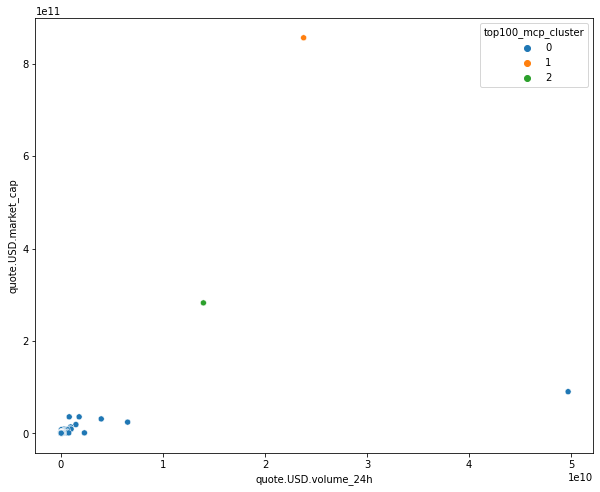

In [92]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_top_100,x='quote.USD.volume_24h',y='quote.USD.market_cap',hue='top100_mcp_cluster',palette='tab10')

In [53]:
data_top_100.head()

name  num_market_pairs  \
0      Bitcoin             10601   
1     Ethereum              7987   
2  Tether USDt             67611   
3          BNB              1823   
4          XRP              1166   

                                                tags  circulating_supply  \
0  [mineable, pow, sha-256, store-of-value, state...         19564225.00   
1  [pos, smart-contracts, ethereum-ecosystem, coi...        120220036.17   
2  [payments, stablecoin, asset-backed-stablecoin...      90255875639.26   
3  [marketplace, centralized-exchange, payments, ...        151697161.05   
4  [medium-of-exchange, enterprise-solutions, arr...      53757460767.00   

    total_supply  infinite_supply              last_updated  quote.USD.price  \
0       19564225            False  2023-12-08T18:06:00.000Z         43781.69   
1   120220036.17             True  2023-12-08T18:06:00.000Z          2350.21   
2 92609080553.21             True  2023-12-08T18:05:00.000Z             1.00   
3   151697161.05            False  2023-12-08T18:05:00.000Z           235.96   
4    99988170772            False  2023-12-08T18:06:00.000Z             0.67   

   quote.USD.volume_24h  quote.USD.volume_change_24h  \
0        23783139932.89                       -11.59   
1        13968139790.74                         3.07   
2        49697399462.85                        -2.00   
3          821453532.04                        -0.11   
4         1792259989.19                       -10.01   

   quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
0                        -0.08                          0.87   
1                        -0.23                          0.58   
2                         0.00                         -0.02   
3                         0.06                          1.23   
4                        -0.11                          3.68   

   quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
0                        12.78                         23.83   
1                        12.18                         24.08   
2                         0.01                          0.02   
3                         3.31                         -4.17   
4                         9.17                         -3.26   

   quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
0                         58.39                         69.22   
1                         48.60                         43.84   
2                          0.01                          0.04   
3                         14.16                          9.81   
4                         32.86                         32.22   

   quote.USD.market_cap  quote.USD.market_cap_dominance  \
0       856554746449.23                           52.70   
1       282541762056.57                           17.38   
2        90275213602.02                            5.55   
3        35793706764.60                            2.20   
4        35787849610.43                            2.20   

   quote.USD.fully_diluted_market_cap  top100_mcp_cluster  
0                     919415395980.87                   1  
1                     282541762056.57                   2  
2                      92628922706.84                   3  
3                      35793706764.60                   4  
4                      66572805150.79                   4

In [59]:
top_5_by_volume = data_top_100.sort_values(by='quote.USD.volume_24h', ascending=False).head(5)
top_5_by_volume

name  num_market_pairs  \
2  Tether USDt             67611   
0      Bitcoin             10601   
1     Ethereum              7987   
6         USDC             15339   
5       Solana               558   

                                                tags  circulating_supply  \
2  [payments, stablecoin, asset-backed-stablecoin...      90255875639.26   
0  [mineable, pow, sha-256, store-of-value, state...         19564225.00   
1  [pos, smart-contracts, ethereum-ecosystem, coi...        120220036.17   
6  [medium-of-exchange, stablecoin, asset-backed-...      24358495256.76   
5  [pos, platform, solana-ecosystem, cms-holdings...        426046835.65   

    total_supply  infinite_supply              last_updated  quote.USD.price  \
2 92609080553.21             True  2023-12-08T18:05:00.000Z             1.00   
0       19564225            False  2023-12-08T18:06:00.000Z         43781.69   
1   120220036.17             True  2023-12-08T18:06:00.000Z          2350.21   
6 24358495256.76            False  2023-12-08T18:04:00.000Z             1.00   
5   564360936.28             True  2023-12-08T18:06:00.000Z            73.43   

   quote.USD.volume_24h  quote.USD.volume_change_24h  \
2        49697399462.85                        -2.00   
0        23783139932.89                       -11.59   
1        13968139790.74                         3.07   
6         6541614221.69                         8.76   
5         3957336299.06                        62.51   

   quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
2                         0.00                         -0.02   
0                        -0.08                          0.87   
1                        -0.23                          0.58   
6                         0.02                         -0.00   
5                         0.77                         11.03   

   quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
2                         0.01                          0.02   
0                        12.78                         23.83   
1                        12.18                         24.08   
6                         0.04                          0.03   
5                        20.52                         71.75   

   quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
2                          0.01                          0.04   
0                         58.39                         69.22   
1                         48.60                         43.84   
6                          0.03                          0.00   
5                        229.21                        277.60   

   quote.USD.market_cap  quote.USD.market_cap_dominance  \
2        90275213602.02                            5.55   
0       856554746449.23                           52.70   
1       282541762056.57                           17.38   
6        24363461012.77                            1.50   
5        31284052776.89                            1.92   

   quote.USD.fully_diluted_market_cap  top100_mcp_cluster  
2                      92628922706.84                   3  
0                     919415395980.87                   1  
1                     282541762056.57                   2  
6                      24363461012.77                   6  
5                      41440273318.54                   4

In [60]:
top_5_market_cap = data_top_100.sort_values(by='quote.USD.market_cap', ascending=False).head()
top_5_market_cap

name  num_market_pairs  \
0      Bitcoin             10601   
1     Ethereum              7987   
2  Tether USDt             67611   
3          BNB              1823   
4          XRP              1166   

                                                tags  circulating_supply  \
0  [mineable, pow, sha-256, store-of-value, state...         19564225.00   
1  [pos, smart-contracts, ethereum-ecosystem, coi...        120220036.17   
2  [payments, stablecoin, asset-backed-stablecoin...      90255875639.26   
3  [marketplace, centralized-exchange, payments, ...        151697161.05   
4  [medium-of-exchange, enterprise-solutions, arr...      53757460767.00   

    total_supply  infinite_supply              last_updated  quote.USD.price  \
0       19564225            False  2023-12-08T18:06:00.000Z         43781.69   
1   120220036.17             True  2023-12-08T18:06:00.000Z          2350.21   
2 92609080553.21             True  2023-12-08T18:05:00.000Z             1.00   
3   151697161.05            False  2023-12-08T18:05:00.000Z           235.96   
4    99988170772            False  2023-12-08T18:06:00.000Z             0.67   

   quote.USD.volume_24h  quote.USD.volume_change_24h  \
0        23783139932.89                       -11.59   
1        13968139790.74                         3.07   
2        49697399462.85                        -2.00   
3          821453532.04                        -0.11   
4         1792259989.19                       -10.01   

   quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
0                        -0.08                          0.87   
1                        -0.23                          0.58   
2                         0.00                         -0.02   
3                         0.06                          1.23   
4                        -0.11                          3.68   

   quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
0                        12.78                         23.83   
1                        12.18                         24.08   
2                         0.01                          0.02   
3                         3.31                         -4.17   
4                         9.17                         -3.26   

   quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
0                         58.39                         69.22   
1                         48.60                         43.84   
2                          0.01                          0.04   
3                         14.16                          9.81   
4                         32.86                         32.22   

   quote.USD.market_cap  quote.USD.market_cap_dominance  \
0       856554746449.23                           52.70   
1       282541762056.57                           17.38   
2        90275213602.02                            5.55   
3        35793706764.60                            2.20   
4        35787849610.43                            2.20   

   quote.USD.fully_diluted_market_cap  top100_mcp_cluster  
0                     919415395980.87                   1  
1                     282541762056.57                   2  
2                      92628922706.84                   3  
3                      35793706764.60                   4  
4                      66572805150.79                   4

In [79]:
cluster_100.inertia_

9.097207406214642e+19

In [83]:
inertia_100 = []

In [84]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_top_100[['top100_mcp_cluster']])
    inertia_100.append(kmeans.inertia_)

<ipython-input-84-b0c18fcbc818>:3: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(data_top_100[['top100_mcp_cluster']])
<ipython-input-84-b0c18fcbc818>:3: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(data_top_100[['top100_mcp_cluster']])


In [85]:
inertia_100

[674.9899999999999,
 44.240000000000265,
 11.32155844155843,
 5.300772200772212,
 2.9642857142857157,
 1.4864864864864864,
 0.5,
 0.0,
 2.3586941066108253e-28,
 2.3586941066108253e-28]

In [86]:
plt.plot(range(1,11), inertia_100)

In [93]:
data_top_100.groupby(['top100_mcp_cluster'])['quote.USD.market_cap', 'quote.USD.volume_24h'].mean()

<ipython-input-93-8739f2c79f21>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_top_100.groupby(['top100_mcp_cluster'])['quote.USD.market_cap', 'quote.USD.volume_24h'].mean()


quote.USD.market_cap  quote.USD.volume_24h
top100_mcp_cluster                                            
0                          4478107393.63          838005441.98
1                        856554746449.23        23783139932.89
2                        282541762056.57        13968139790.74

In [94]:
data_top_100['top100_mcp_cluster'].value_counts()

0    98
2     1
1     1
Name: top100_mcp_cluster, dtype: int64

In [96]:
data_top_100[data_top_100['top100_mcp_cluster'] == 1]

name  num_market_pairs  \
0  Bitcoin             10601   

                                                tags  circulating_supply  \
0  [mineable, pow, sha-256, store-of-value, state...         19564225.00   

  total_supply  infinite_supply              last_updated  quote.USD.price  \
0     19564225            False  2023-12-08T18:06:00.000Z         43781.69   

   quote.USD.volume_24h  quote.USD.volume_change_24h  \
0        23783139932.89                       -11.59   

   quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
0                        -0.08                          0.87   

   quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
0                        12.78                         23.83   

   quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
0                         58.39                         69.22   

   quote.USD.market_cap  quote.USD.market_cap_dominance  \
0       856554746449.23                           52.70   

   quote.USD.fully_diluted_market_cap  top100_mcp_cluster  
0                     919415395980.87                   1

In [97]:
data_top_100[data_top_100['top100_mcp_cluster'] == 2]

name  num_market_pairs  \
1  Ethereum              7987   

                                                tags  circulating_supply  \
1  [pos, smart-contracts, ethereum-ecosystem, coi...        120220036.17   

  total_supply  infinite_supply              last_updated  quote.USD.price  \
1 120220036.17             True  2023-12-08T18:06:00.000Z          2350.21   

   quote.USD.volume_24h  quote.USD.volume_change_24h  \
1        13968139790.74                         3.07   

   quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
1                        -0.23                          0.58   

   quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
1                        12.18                         24.08   

   quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
1                         48.60                         43.84   

   quote.USD.market_cap  quote.USD.market_cap_dominance  \
1       282541762056.57                           17.38   

   quote.USD.fully_diluted_market_cap  top100_mcp_cluster  
1                     282541762056.57                   2

# Final Results
As expected, the market moves with Bitcoin and Ethereum.  They have the highest market cap and volume so it makes sense that they would have the highest values. 